

## S3. Image generation using Stable Diffusion



Install required libraries

In [11]:
! pip install diffusers transformers torch accelerate pillow

### Check GPU availability

In [12]:
import torch
print(f"cuda available: {torch.cuda.is_available()}" )

cuda available: True


Load diffusion model

In [13]:
from diffusers import StableDiffusionPipeline , EulerAncestralDiscreteScheduler
from PIL import Image
import os

model_name = "stabilityai/stable-diffusion-2-1-base"
scheduler = EulerAncestralDiscreteScheduler.from_pretrained(model_name, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_name, scheduler=scheduler, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

os.makedirs("generated_images",exist_ok=True)



Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Generate images from text prompts

In [14]:
prompt = [
    "A high resolution photo of a black cat, realistic, studio lighting, on a white floor, brown background",
    "A futuristic photo of a white cat, black background, cinematic style, neon lights"
]

for i, prompt in enumerate(prompt):
  image = pipe(
      prompt = prompt,
      num_inference_steps=50,
      guidance_scale=7.5,
      height=512,
      width=512
  ).images[0]

  image.save(f"generated_images/prompt{i+1}.png")
  print(f"Saved: generated_images/prompt{i+1}.png")


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: generated_images/prompt1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: generated_images/prompt2.png


Display generated images

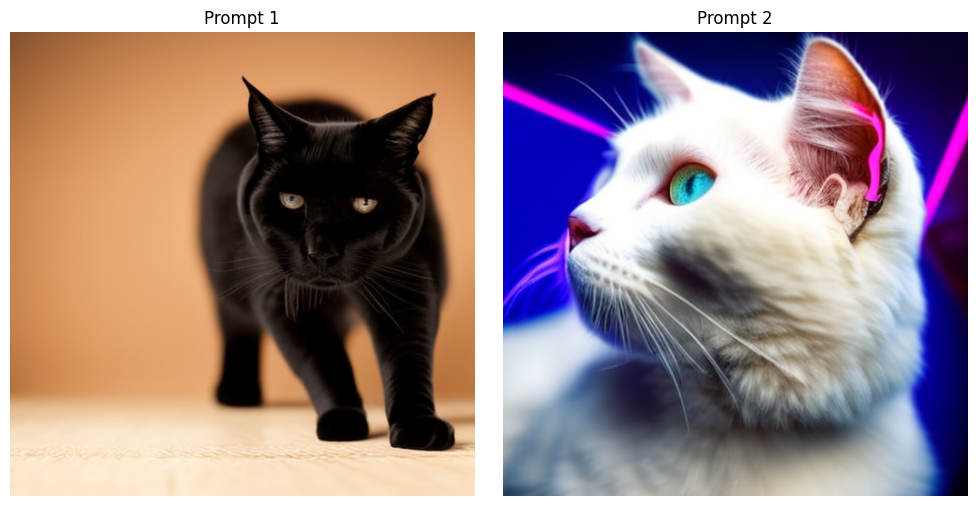

In [15]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(1,2,figsize=(10,5))

for i,ax in enumerate(axes):
  image = Image.open(f"generated_images/prompt{i+1}.png")
  ax.imshow(image)
  ax.axis("off")
  ax.set_title(f"Prompt {i+1}")

plt.tight_layout()
plt.show()

Create image variations using image to image pipeline

In [10]:
from diffusers import StableDiffusionImg2ImgPipeline
import requests
from PIL import Image

pipe_i2i = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_name,
    torch_dtype = torch.float16
)

path = "dataset_custom/"
pipe_i2i = pipe_i2i.to("cuda")

prompt_var = "a realistic cat  "

for i in range(2):
  variation = pipe_i2i(
    prompt = prompt_var,
    image = Image.open(f"dataset_custom/images{i+1}.jpeg"),
    strenght = 0.7 + (i*0.1),
    guidance_scale = 7.5 + (i*0.5)
  ).images[0]
  variation.save(f"generated_images/variation_{i}.png")
  print(f"Saved: generated_images/variation_{i}.png")


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Saved: generated_images/variation_0.png


  0%|          | 0/40 [00:00<?, ?it/s]

Saved: generated_images/variation_1.png


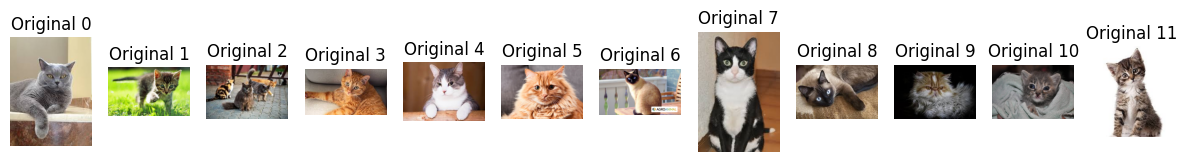

In [16]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Ruta de las imágenes originales
path = "dataset_custom/"

# Filtra solo archivos .jpeg o .jpg
images = [f for f in os.listdir(path) if f.lower().endswith((".jpeg", ".jpg"))]

# Muestra las imágenes originales
fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
for i, ax in enumerate(axes):
    img = Image.open(os.path.join(path, images[i]))
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"Original {i}")
plt.show()


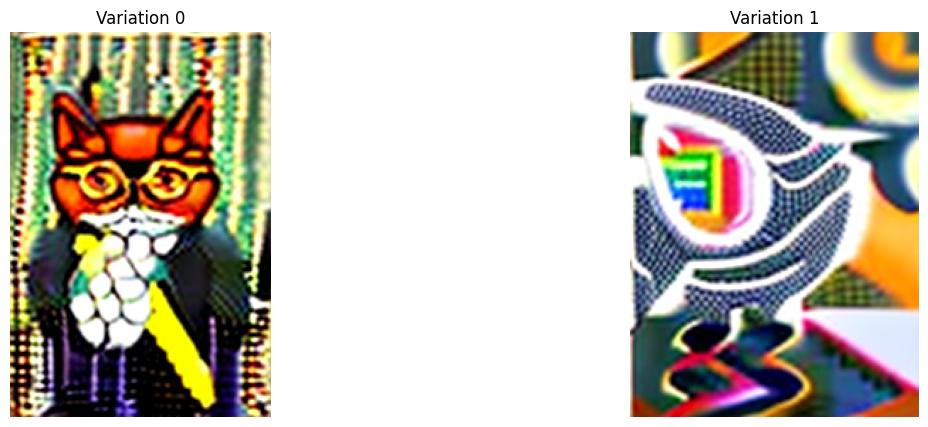

In [17]:
# Ruta de las imágenes generadas
gen_path = "generated_images/"

# Filtra solo las variaciones guardadas
variations = [f for f in os.listdir(gen_path) if f.startswith("variation") and f.endswith(".png")]

# Mostrar las variaciones
fig, axes = plt.subplots(1, len(variations), figsize=(15, 5))
for i, ax in enumerate(axes):
    img = Image.open(os.path.join(gen_path, variations[i]))
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"Variation {i}")
plt.show()
